In [1]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you 

In [12]:
# import
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
load data sets
"""
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head(3)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
"""
preprocessing
"""
# 1.split data sets into X and y
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

# 2.scale X
ss = StandardScaler() # data scaling method to make the data zero mean and unit variance
X_std = pd.DataFrame(ss.fit_transform(X), columns=X.columns) 
print(X_std.head(3))

# 3.split scaled X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=0)

   pregnant    plasma  pressure  thickness   insulin       bmi  pedigree  \
0  0.639947  0.848324  0.149641   0.907270 -0.692891  0.204013  0.468492   
1 -0.844885 -1.123396 -0.160546   0.530902 -0.692891 -0.684422 -0.365061   
2  1.233880  1.943724 -0.263941  -1.288212 -0.692891 -1.103255  0.604397   

        age  
0  1.425995  
1 -0.190672  
2 -0.105584  


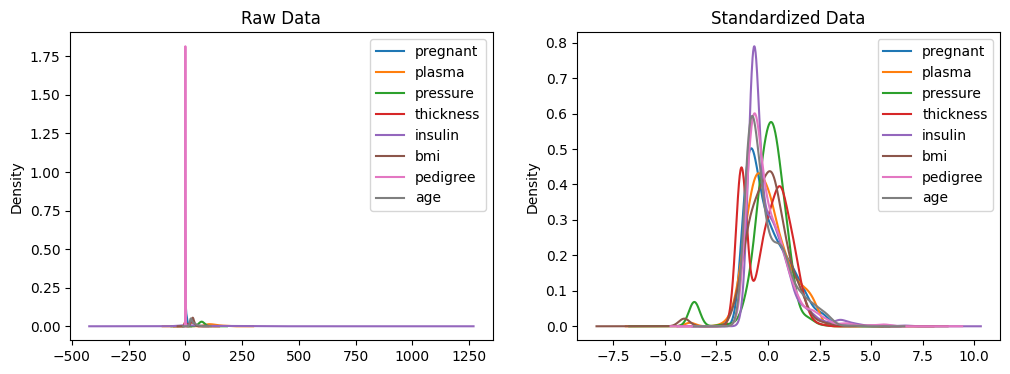

In [4]:
# show the distribution of the data in graph
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde', title='Raw Data', ax=ax[0])
X_std.plot(kind='kde', title='Standardized Data', ax=ax[1])
plt.show()

In [5]:
def evaluation(classifier, X_std, y):
    """    
    :param classifier: 
    :param X_std: 
    :param y: 
    """
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    acc = cross_val_score(classifier, X_std, y, cv=skf)

    print('Accuracy: {:.2f}%'.format(acc.mean()*100))
    print('Standard Deviation: {:.2f}%'.format(acc.std()*100))

In [6]:
"""
#1. decision tree
"""
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

# show evaluation
evaluation(classifier, X_std, y)

Accuracy: 69.78%
Standard Deviation: 3.75%


# StratifiedKFold vs KFold
https://stackoverflow.com/questions/65318931/stratifiedkfold-vs-kfold-in-scikit-learn#:~:text=You%20need%20to%20know%20what,observations%20with%20a%20given%20label.

학습셋을 K번마다 K개의 셋으로 나눠서 train 및 validation과정을 거치는 것을 KFold 교차검증이라고 한다.
하지만, 이 경우에는 train, validation 셋을 나누는 과정이 랜덤하게 나눠지므로
데이터가 imbalance한 경우에는 train, validation셋의 label의 비율이 어긋나게된다.
극단적으로 training set이 참인 label이 1000개 거짓인 label이 10개있다고 치자.
그럼 확률적으로 나누는 KFold를 사용한다면, K등분했을때 거짓인 label이 validation 셋에 1개도 없을 수 있다.
그러면 당연히 제대로된 검증이 되지 않으므로
Stratified Kfold를 사용한다.
번역하면 계층화된 KFold라는 뜻이다.
Straitified KFold를 사용하면 imbalance한 training set에서 비율에 맞게 train, validation 셋을 나눌수 있다.


In [6]:
"""
#2. random forest
"""
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)  # n_estimators: the number of trees in the forest
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 75.38%
Standard Deviation: 5.53%


In [8]:
"""
#3. gausian naive bayes
"""
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 75.66%
Standard Deviation: 3.60%


In [10]:
"""
#4. k-nearest neighbors
"""
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5) # n_neighbors: the number of neighbors to use
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 73.97%
Standard Deviation: 5.23%


In [13]:
"""
#5. ada boost
"""
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=50) # n_estimators: the maximum number of estimators at which boosting is terminated
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 74.75%
Standard Deviation: 3.65%


In [14]:
"""
#6. quadratic discriminant analysis
"""
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 73.96%
Standard Deviation: 3.70%


In [15]:
"""
#7. support vector machine
"""
from sklearn.svm import SVC

classifier = SVC(kernel='linear') # kernel: Specifies the kernel type to be used in the algorithm
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 76.95%
Standard Deviation: 3.02%


In [16]:
"""
#8. support vector machine with rbf kernel
"""
from sklearn.svm import SVC

classifier = SVC(kernel='rbf') # kernel: Specifies the kernel type to be used in the algorithm
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 76.83%
Standard Deviation: 4.51%


In [17]:
"""
#9. voting
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier(n_estimators=50)
clf2 = QuadraticDiscriminantAnalysis()
clf3 = SVC(kernel='linear')

classifier = VotingClassifier(estimators=[('ab', clf1), ('qda', clf2), ('svc', clf3)])
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

Accuracy: 76.43%
Standard Deviation: 4.71%


In [18]:
"""
#10. bagging
"""
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'),n_estimators=100) # n_estimators: the number of base estimators in the ensemble
classifier.fit(X_train, y_train)

predict = classifier.predict(X_test)

evaluation(classifier, X_std, y)

/Users/godpeny/Code/venv/laboratory/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/godpeny/Code/venv/laboratory/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/godpeny/Code/venv/laboratory/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/godpeny/Code/venv/laboratory/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/godpeny/Code/venv/laboratory/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `e

Accuracy: 76.16%
Standard Deviation: 3.99%
